# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
import pandas as pd
import json
from pandas.io.json import json_normalize



In [9]:
#read in json file to pandas
json_df = pd.read_json('data/world_bank_projects.json')


In [10]:
#Q1:
#isolate 'country' column
country = json_df['countryname']

#sort countries by number of projects, return top 10
top_10_countries = country.value_counts().head(10)

#print top 10 countries
print(top_10_countries)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


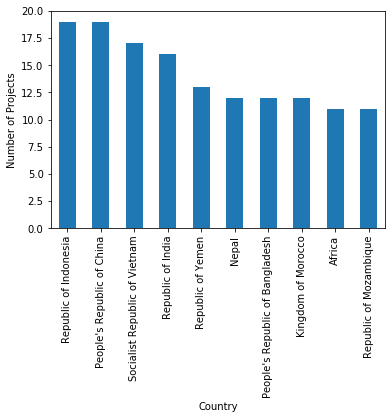

In [28]:
#plot histogram of top 10 number of projects by frequency
country_plot = top_10_countries.plot(kind='bar')
country_plot.set_ylim((0, 20))
country_plot.set_xlabel('Country')
country_plot.set_ylabel('Number of Projects')
print(country_plot)

In [12]:
#Q2: 
#isolate 'mjtheme_namecode' column
theme_code = json_df['mjtheme_namecode']

In [13]:
#create list of all dictionaries from each row
all_codes = []
for row in theme_code:
    all_codes.append(row[:])

In [14]:
#reduce list of lists to one list
one_list = [item for sublist in all_codes for item in sublist]

In [15]:
#put list of theme names into Series
themes = pd.Series(x.get('name') for x in one_list)

#remove blank entries
themes_non_blank = themes[themes !='']

In [16]:
#find top 10 most frequent themes
top_10_themes = themes_non_blank.value_counts().head(10)

#print top 10
print(top_10_themes)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


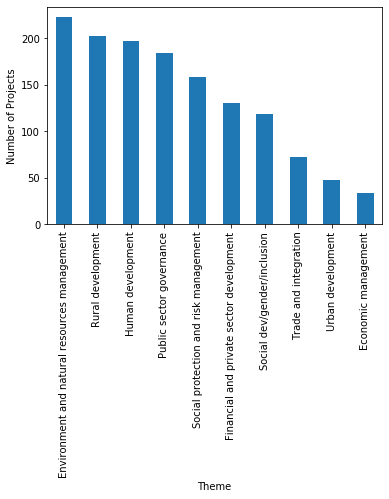

In [17]:
#plot histogram of top 10 themes of projects by frequency
theme_plot = top_10_themes.plot(kind='bar')
theme_plot.set_xlabel('Theme')
theme_plot.set_ylabel('Number of Projects')
print(theme_plot)

In [18]:
#Q3:
# define json string
json_data = json.load((open('data/world_bank_projects.json')))


In [19]:
# use normalization to create tables from nested element
code_name_df = json_normalize(json_data, 'mjtheme_namecode')

In [20]:
#import Numpy
import numpy as np
#replace missing entries with NaN and reindex df
code_name_nan = code_name_df.replace('', np.nan).set_index('code')

In [21]:
#drop NaNs 
code_name_dropped = code_name_nan.dropna()

In [22]:
#create a dictionary of code keys
code_dict = code_name_dropped['name'].to_dict()

In [23]:
#map theme names from theme codes
code_name_df['name'] = code_name_df['code'].map(code_dict)

In [24]:
#find top 10 most frequent themes, missing values filled in
themes_filled = pd.Series(code_name_df['name'].value_counts().head(10))
print(themes_filled)


Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


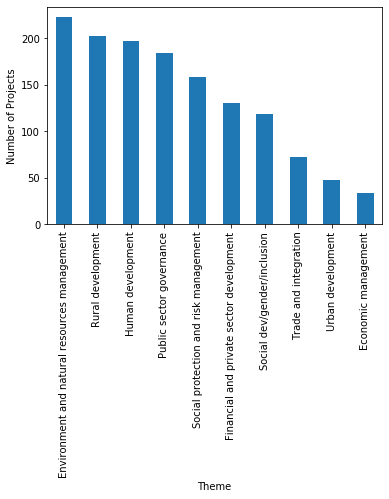

In [25]:
#top_10_themes = code_name_df.value_counts().head(10)
themes_filled_plot = top_10_themes.plot(kind='bar')
themes_filled_plot.set_xlabel('Theme')
themes_filled_plot.set_ylabel('Number of Projects')
print(themes_filled_plot)

In [26]:
#list all column names
categories = []
categories = list(json_df.columns)
#remove duplicate columnn of 'mjtheme_namecode'
del categories[categories.index('mjtheme_namecode')]
#re-populate the data table
json_table = json_normalize(json_data, 'mjtheme_namecode', categories, errors='ignore')


In [27]:
#map theme names from theme codes to fill in missing values
json_table['name'] = json_table['code'].map(code_dict)
json_table

,code,name,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,8,Human development,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,11,Environment and natural resources management,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
2,1,Economic management,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
3,6,Social protection and risk management,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
4,5,Trade and integration,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,10,Rural development,[{'Name': 'Agricultural extension and research...,N,IBRD,PE,"[Rural development, Rural development, Rural d...",0,INDONESIAN AGENCY FOR AGRICULTURAL RESEARCH AN...,Sustainable Management of Agricultural Researc...,...,"[{'Percent': 80, 'Name': 'Agriculture, fishing...",August,"[{'code': '78', 'name': 'Rural services and in...",Republic of Indonesia,http://www.worldbank.org/projects/P117243/sust...,IBRD,Active,80000000,"[{'code': 'AB', 'name': 'Agricultural extensio...",{'$oid': '52b213b38594d8a2be17c972'}
1495,9,Urban development,"[{'Name': 'Urban Transport'}, {'Name': 'Public...",N,IDA,PE,"[Urban development, Human development, Trade a...",300000000,MINISTRY OF ROADS,KENYA: NATIONAL URBAN TRANSPORT IMPROVEMENT PR...,...,"[{'Percent': 79, 'Name': 'Transportation'}, {'...",August,"[{'code': '73', 'name': 'Municipal governance ...",Republic of Kenya,http://www.worldbank.org/projects/P126321/keny...,IBRD,Active,0,"[{'code': 'TC', 'name': 'Urban Transport'}, {'...",{'$oid': '52b213b38594d8a2be17c973'}
1496,8,Human development,"[{'Name': 'Urban Transport'}, {'Name': 'Public...",N,IDA,PE,"[Urban development, H